In [1]:
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
# start = '2002-01-01'
# end = '2022-01-01'
# source = 'yahoo'

# df = pdr.DataReader('AAPL', 'yahoo', start, end)
df = pd.read_csv("/content/drive/MyDrive/Stock Prediction Analysis/AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,0.393750,0.416071,0.392143,0.416071,0.356271,529496800
1,2002-01-03,0.410714,0.424107,0.406607,0.421071,0.360552,612007200
2,2002-01-04,0.416786,0.427679,0.410536,0.423036,0.362235,409976000
3,2002-01-07,0.423571,0.428571,0.406250,0.408929,0.350155,444584000
4,2002-01-08,0.406250,0.411607,0.401071,0.403750,0.345721,450038400


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5031,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
5032,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
5033,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900
5034,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000
5035,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300


In [4]:
# df = df.reset_index()
# df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5036 non-null   object 
 1   Open       5036 non-null   float64
 2   High       5036 non-null   float64
 3   Low        5036 non-null   float64
 4   Close      5036 non-null   float64
 5   Adj Close  5036 non-null   float64
 6   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.5+ KB


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.393750,0.416071,0.392143,0.416071,529496800
1,0.410714,0.424107,0.406607,0.421071,612007200
2,0.416786,0.427679,0.410536,0.423036,409976000
3,0.423571,0.428571,0.406250,0.408929,444584000
4,0.406250,0.411607,0.401071,0.403750,450038400


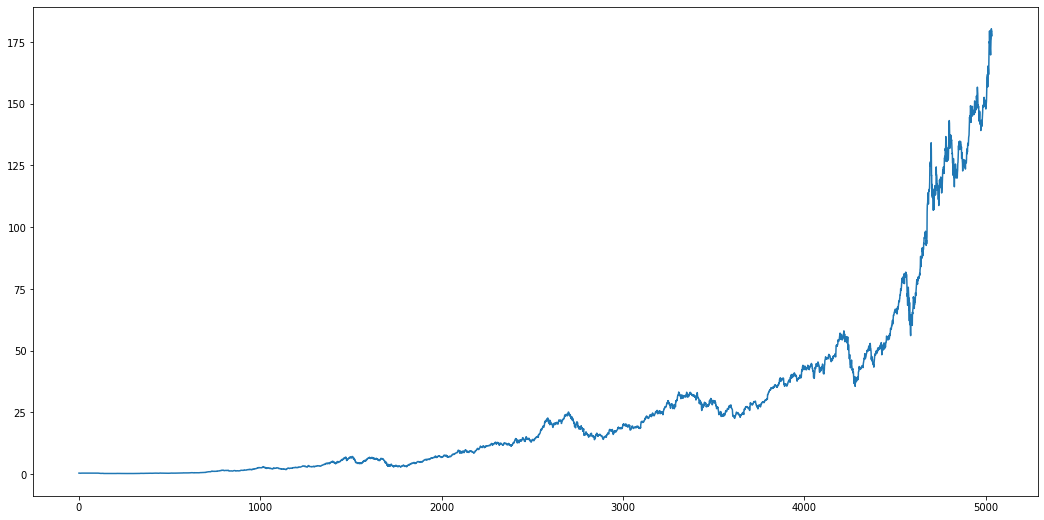

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,0.393750,0.416071,0.392143,0.416071,529496800
1,0.410714,0.424107,0.406607,0.421071,612007200
2,0.416786,0.427679,0.410536,0.423036,409976000
3,0.423571,0.428571,0.406250,0.408929,444584000
4,0.406250,0.411607,0.401071,0.403750,450038400
...,...,...,...,...,...
5031,177.089996,180.419998,177.070007,180.330002,74919600
5032,180.160004,181.330002,178.529999,179.289993,79144300
5033,179.330002,180.630005,178.139999,179.380005,62348900
5034,179.470001,180.570007,178.089996,178.199997,59773000


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5031    153.3444
5032    153.6667
5033    153.9991
5034    154.3202
5035    154.6399
Name: Close, Length: 5036, dtype: float64

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5031    142.85570
5032    143.13220
5033    143.40125
5034    143.66845
5035    143.95365
Name: Close, Length: 5036, dtype: float64

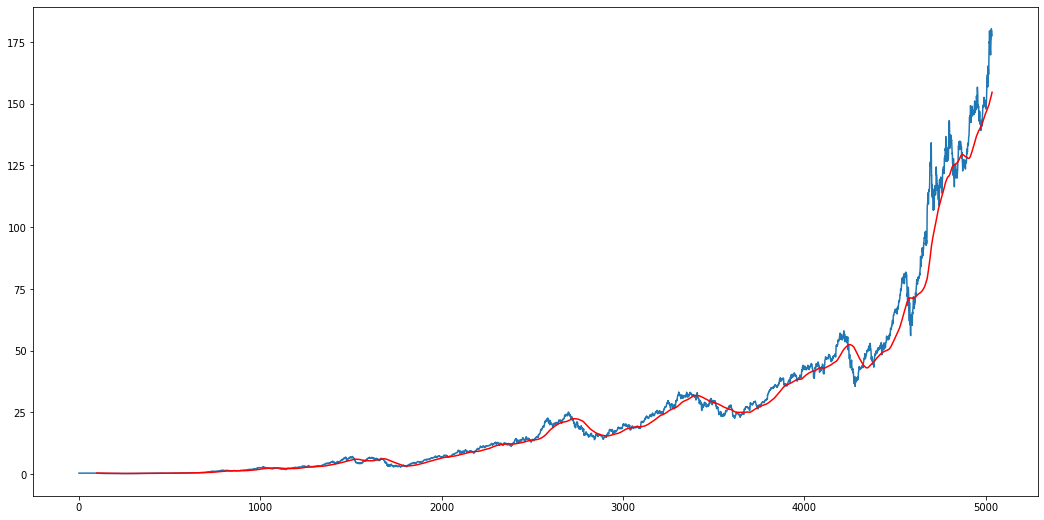

In [10]:
plt.figure(figsize=(18,9))
plt.plot(df.Close)
plt.plot(ma100, 'r')

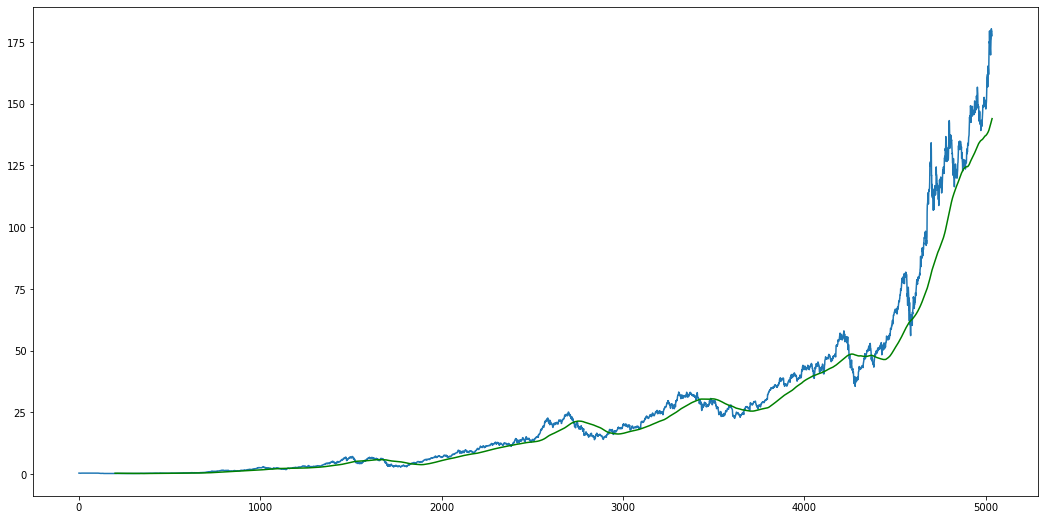

In [11]:
plt.figure(figsize=(18,9))
plt.plot(df.Close)
plt.plot(ma200, 'g')

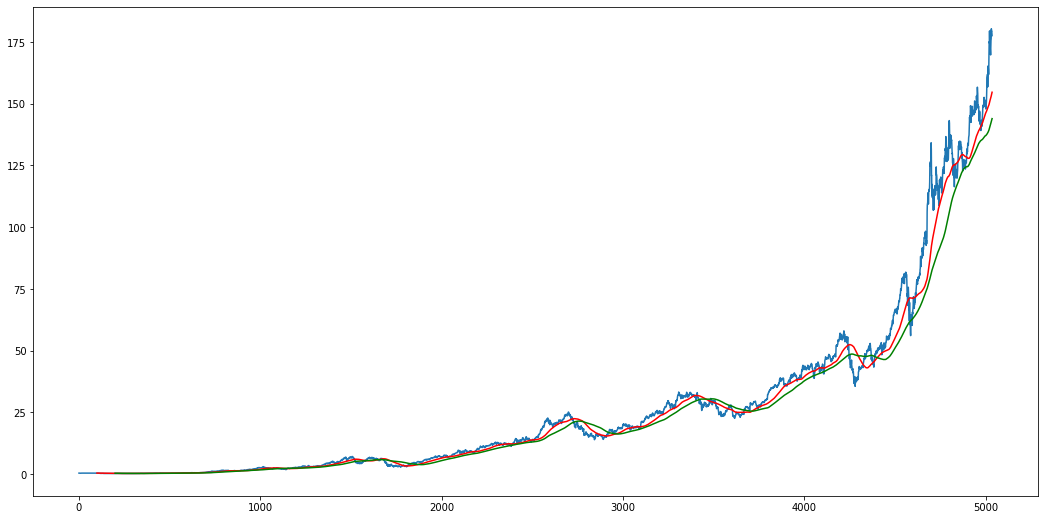

In [12]:
plt.figure(figsize=(18,9))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [14]:
print(data_training.shape)
print(data_testing.shape)

(3525, 1)
(1511, 1)


In [15]:
data_training.head()

,Close
0,0.416071
1,0.421071
2,0.423036
3,0.408929
4,0.403750


In [16]:
data_testing.head()

,Close
3525,26.337500
3526,25.677500
3527,25.174999
3528,24.112499
3529,24.240000


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.00550601]
 [0.00565746]
 [0.00571697]
 ...
 [0.81629957]
 [0.80554714]
 [0.78994854]]


In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
108/108 [==============================] - 24s 187ms/step - loss: 0.0223
Epoch 2/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0053
Epoch 3/50
108/108 [==============================] - 20s 187ms/step - loss: 0.0048
Epoch 4/50
108/108 [==============================] - 20s 187ms/step - loss: 0.0041
Epoch 5/50
108/108 [==============================] - 20s 187ms/step - loss: 0.0039
Epoch 6/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0037
Epoch 7/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0039
Epoch 8/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0036
Epoch 9/50
108/108 [==============================] - 20s 186ms/step - loss: 0.0031
Epoch 10/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0038
Epoch 11/50
108/108 [==============================] - 20s 188ms/step - loss: 0.0031
Epoch 12/50
108/108 [==============================] - 20s 188ms/step - lo

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [39]:
model.save("keras_model.h5")

In [40]:
data_testing.head()

,Close
3525,26.337500
3526,25.677500
3527,25.174999
3528,24.112499
3529,24.240000


In [41]:
past_100_days = data_training.tail(100)

In [42]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [45]:
final_df.head()

,Close
0,28.372499
1,28.809999
2,28.787500
3,28.990000
4,29.290001


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03668896],
       [0.03946242],
       [0.03931979],
       ...,
       [0.99397764],
       [0.98649716],
       [0.98250344]])

In [48]:
input_data.shape

(1611, 1)

In [49]:
x_test = []
y_test = []


for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1511, 100, 1)
(1511,)


In [51]:
#making predictions

y_predicted = model.predict(x_test)

In [52]:
y_predicted.shape

(1511, 1)

In [53]:
y_test

array([0.0237884 , 0.01960443, 0.0164189 , ..., 0.99397764, 0.98649716,
       0.98250344])

In [54]:
y_predicted

array([[0.09929536],
       [0.09865718],
       [0.0979948 ],
       ...,
       [0.93122447],
       [0.9333415 ],
       [0.93566644]], dtype=float32)

In [55]:
scaler.scale_

array([0.00633935])

In [56]:
scaled_factor = 1/0.00633935
y_predicted = y_predicted * scaled_factor
y_test = y_test * scaled_factor

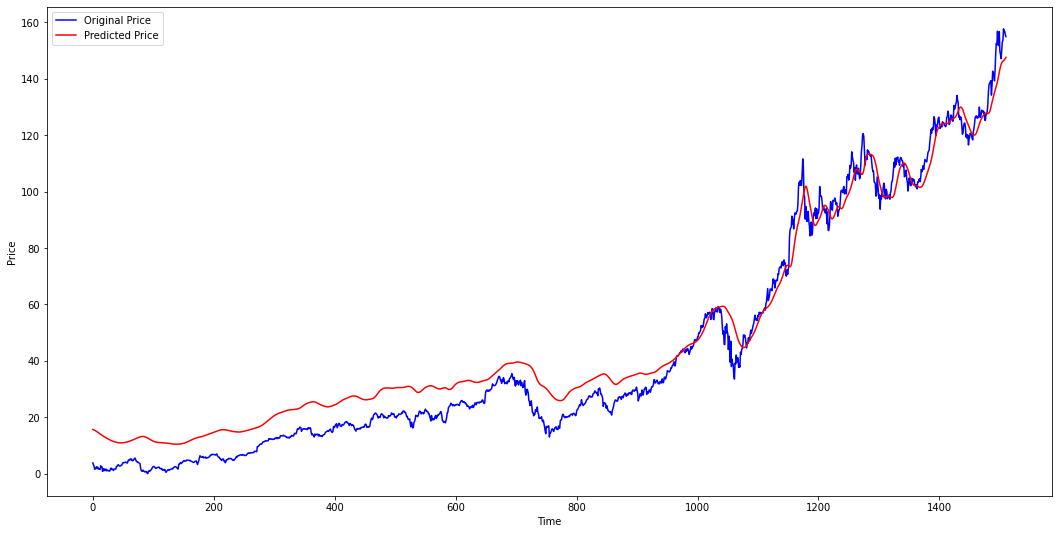

In [58]:
plt.figure(figsize=(18, 9))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()